# Introduction
The NovaTel Customer Retention Analytics project focuses on understanding why customers leave the company and what factors influence churn. The dataset contains customer demographics, service usage patterns, contract types, payment methods, monthly charges, and churn status.

This project explores the data step-by-step from cleaning and visual analysis to building a simple machine-learning model that predicts whether a customer is likely to churn. The purpose is to generate clear insights that can help reduce churn and improve customer retention strategies.

# Project Objectives
A. Analytics / Business Understanding


1. What percentage of NovaTel customers churn, and how serious is the issue? 
2. Which segments of customers churn the most? (by gender, age group, tenure, etc.)
3. How does contract type impact churn?
4. Do customers with higher monthly charges tend to leave more?
5. Does internet service type (Fiber/DSL/None) affect churn rates?
6. Is tenure (months with NovaTel) one of the strongest indicators of churn?
7. Which payment methods or service features show higher churn?
8. Are there any patterns or correlations that stand out in customer behavior?


B. Final Outcome of the Project


1. A cleaned dataset ready for dashboarding and ML
2. EDA visualizations showing churn patterns
3. Actionable recommendations for customer retention

# Loading libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data
df = pd.read_csv("E:\Projects\TelNova\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Assessing Data

In [147]:
#Shape of the dataset
df.shape

(7043, 21)

In [148]:
#first five rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
#random five rows of the dataset
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4214,4228-ZGYUW,Male,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,368.1,Yes
829,5337-IIWKZ,Male,0,Yes,Yes,34,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,44.85,1442.6,No
5763,9633-XQABV,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.25,229.7,No
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359,Yes
1344,0536-BGFMZ,Female,0,Yes,No,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,563.05,No


In [150]:
#data types of the columns and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [154]:
#checking missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

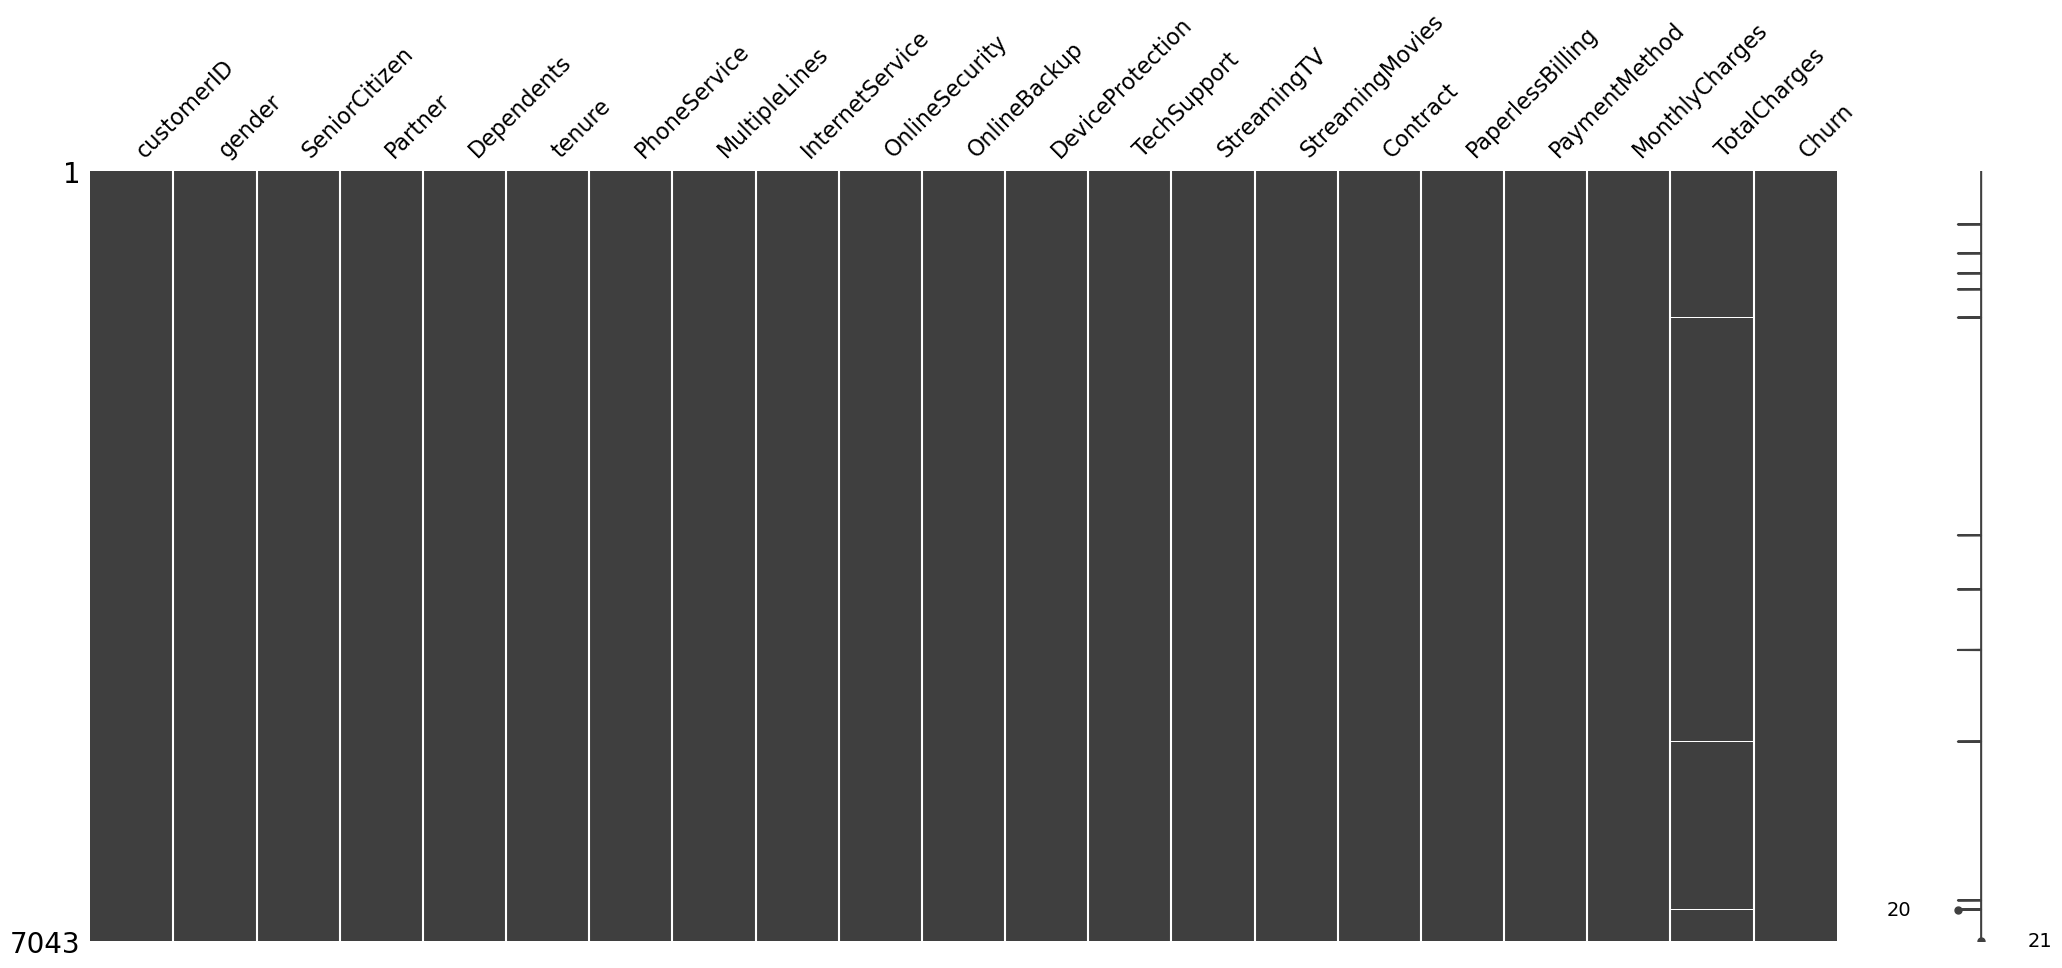

In [155]:
#visualizing missing values
msno.matrix(df);

In [156]:
#unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [157]:
# presence of duplicate rows
df.duplicated().sum()

np.int64(0)

# Cleaning Data

### Incorrect DataType

In [152]:
# convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Dealing missing data

In [98]:
#rows with missing 'TotalCharges'
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [158]:
# records with tenure 0
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Missing values in the TotalCharges column coincided with a tenure of 0. These records represent new customers who have not yet received their first bill. Given the small number of such records (N=11) and the ambiguity they introduce to the Churn prediction target, the best approach is to remove these records from the dataset.

In [159]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [160]:
df.shape

(7032, 21)

In [161]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation

In [162]:
#droping 'customerID' column as it doesn't add any value to the analysis
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
#Suitable data types
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [164]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [165]:
# statistical summary of numerical columns
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [166]:
# correlation matrix
df.corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## 1. Univariate Analysis  (Numerical Features)

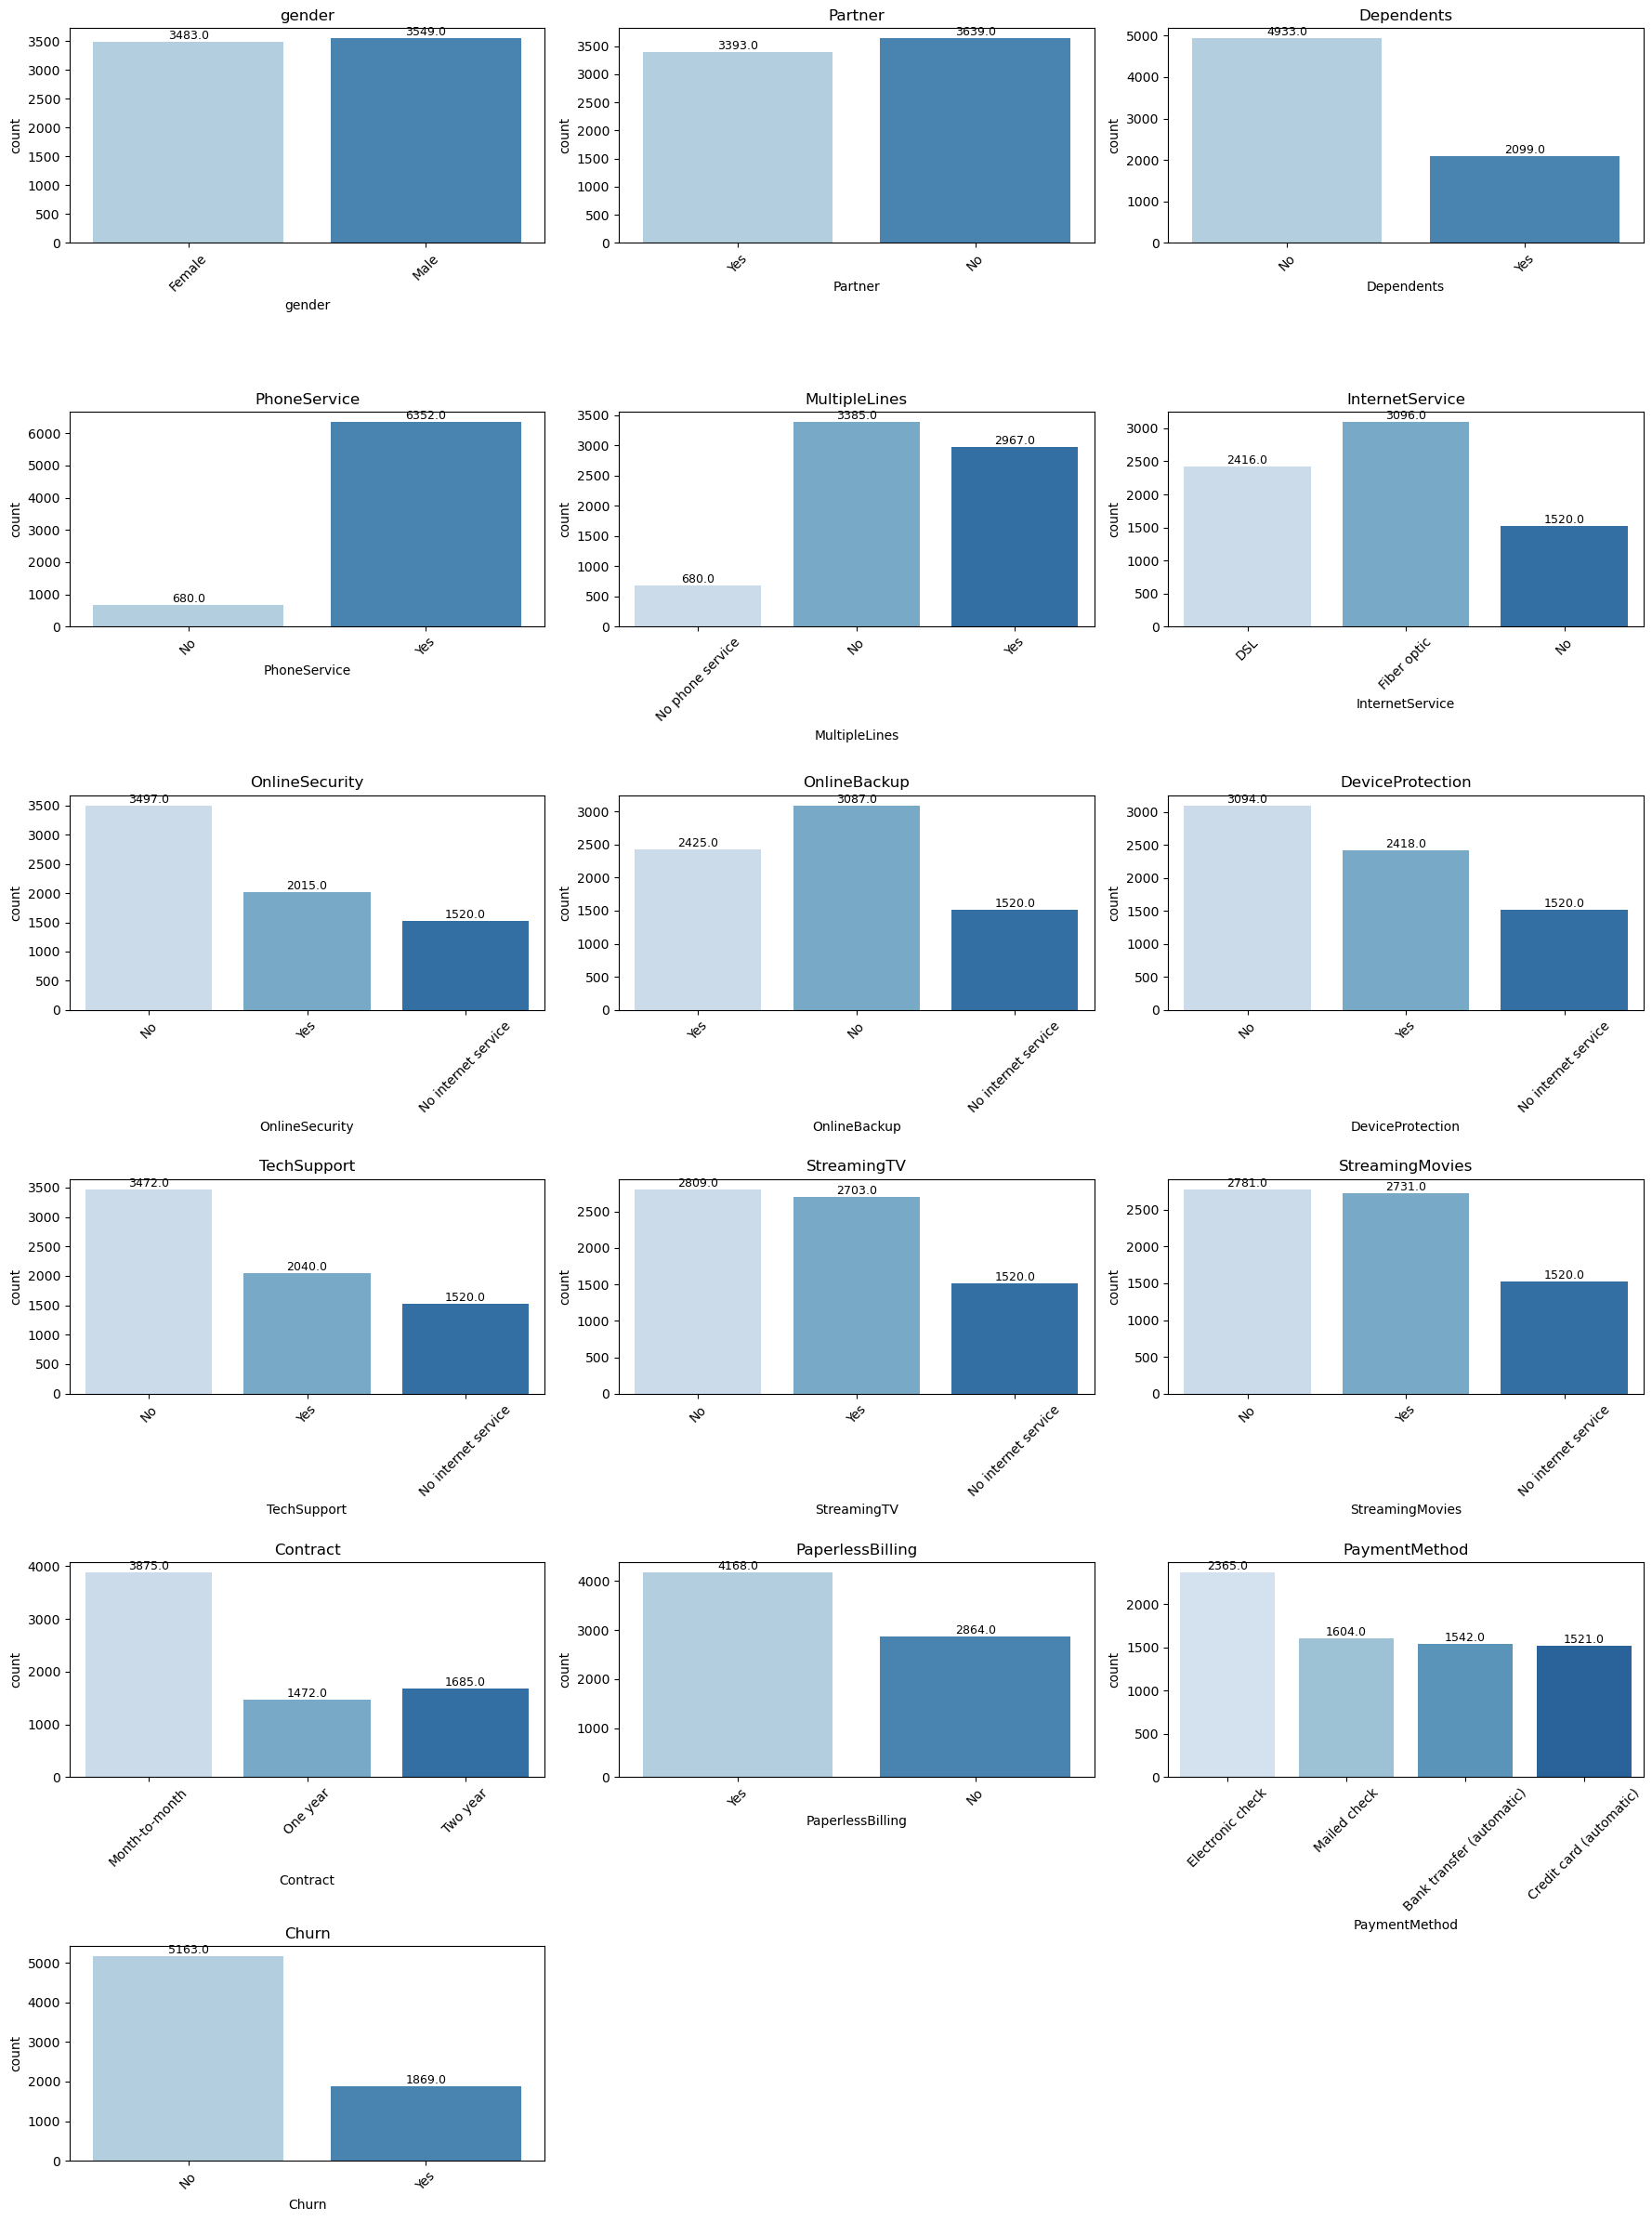

In [218]:
import math
categorical_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Contract',
                    'PaperlessBilling','PaymentMethod','Churn']

rows = math.ceil(len(categorical_cols)/3)
plt.figure(figsize=(18, rows*4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    ax = sns.countplot(data=df, x=col, palette='Blues')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9)

    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 2. Univariate Analysis (Numerical Columns) + Mean/Median Lines

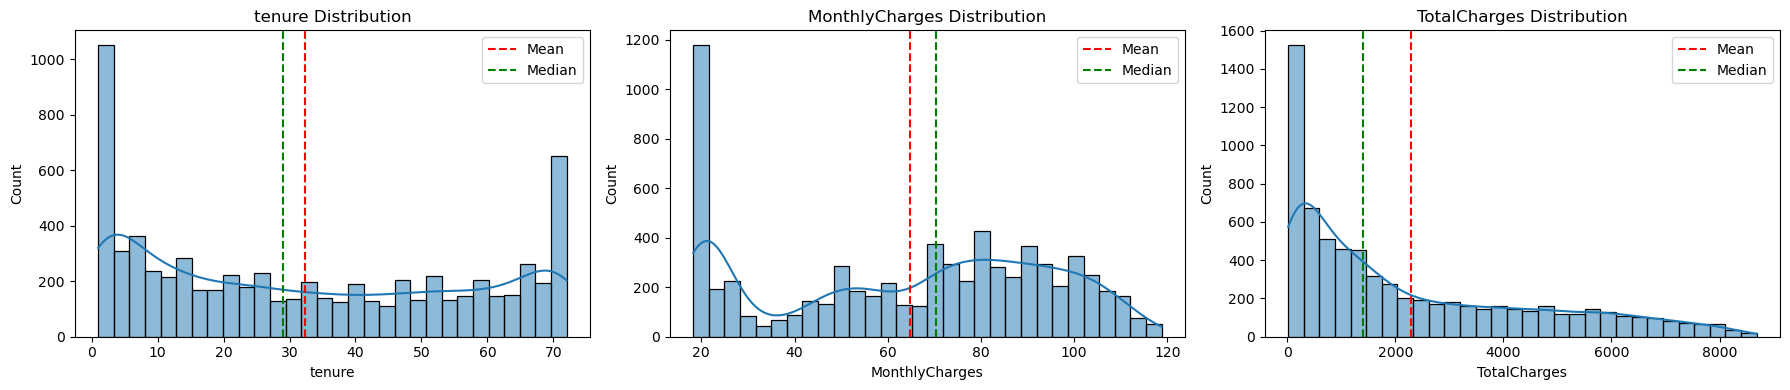

In [226]:
import math

numerical_cols = ['tenure','MonthlyCharges','TotalCharges']

n = len(numerical_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=30)

    # Mean + Median
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='Median')

    plt.title(f'{col} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


## 3. Histogram Plots

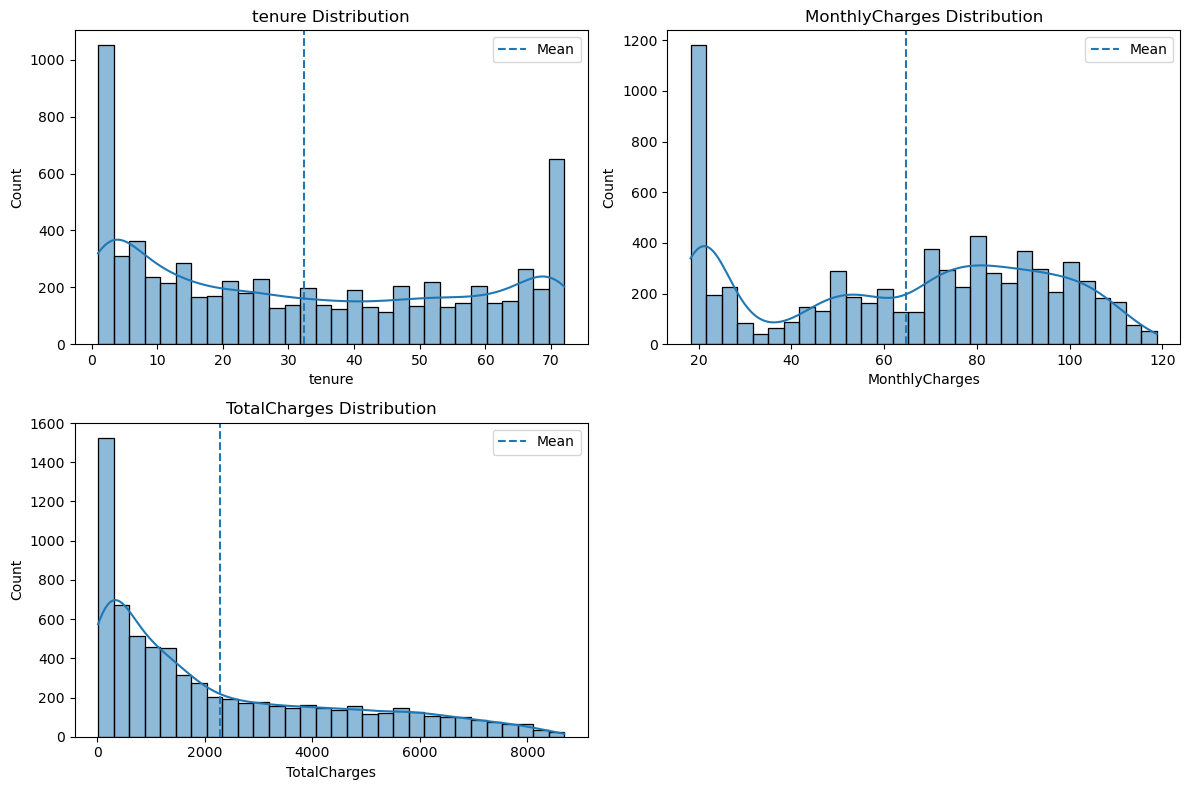

In [222]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']   # update accordingly

rows = math.ceil(len(numerical_cols)/2)
plt.figure(figsize=(12, rows*4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[col], bins=30, kde=True)

    plt.axvline(df[col].mean(), linestyle='--', label='Mean')
    plt.title(f'{col} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


## 4. Bivariate Analysis (Categorical vs Target - Churn)

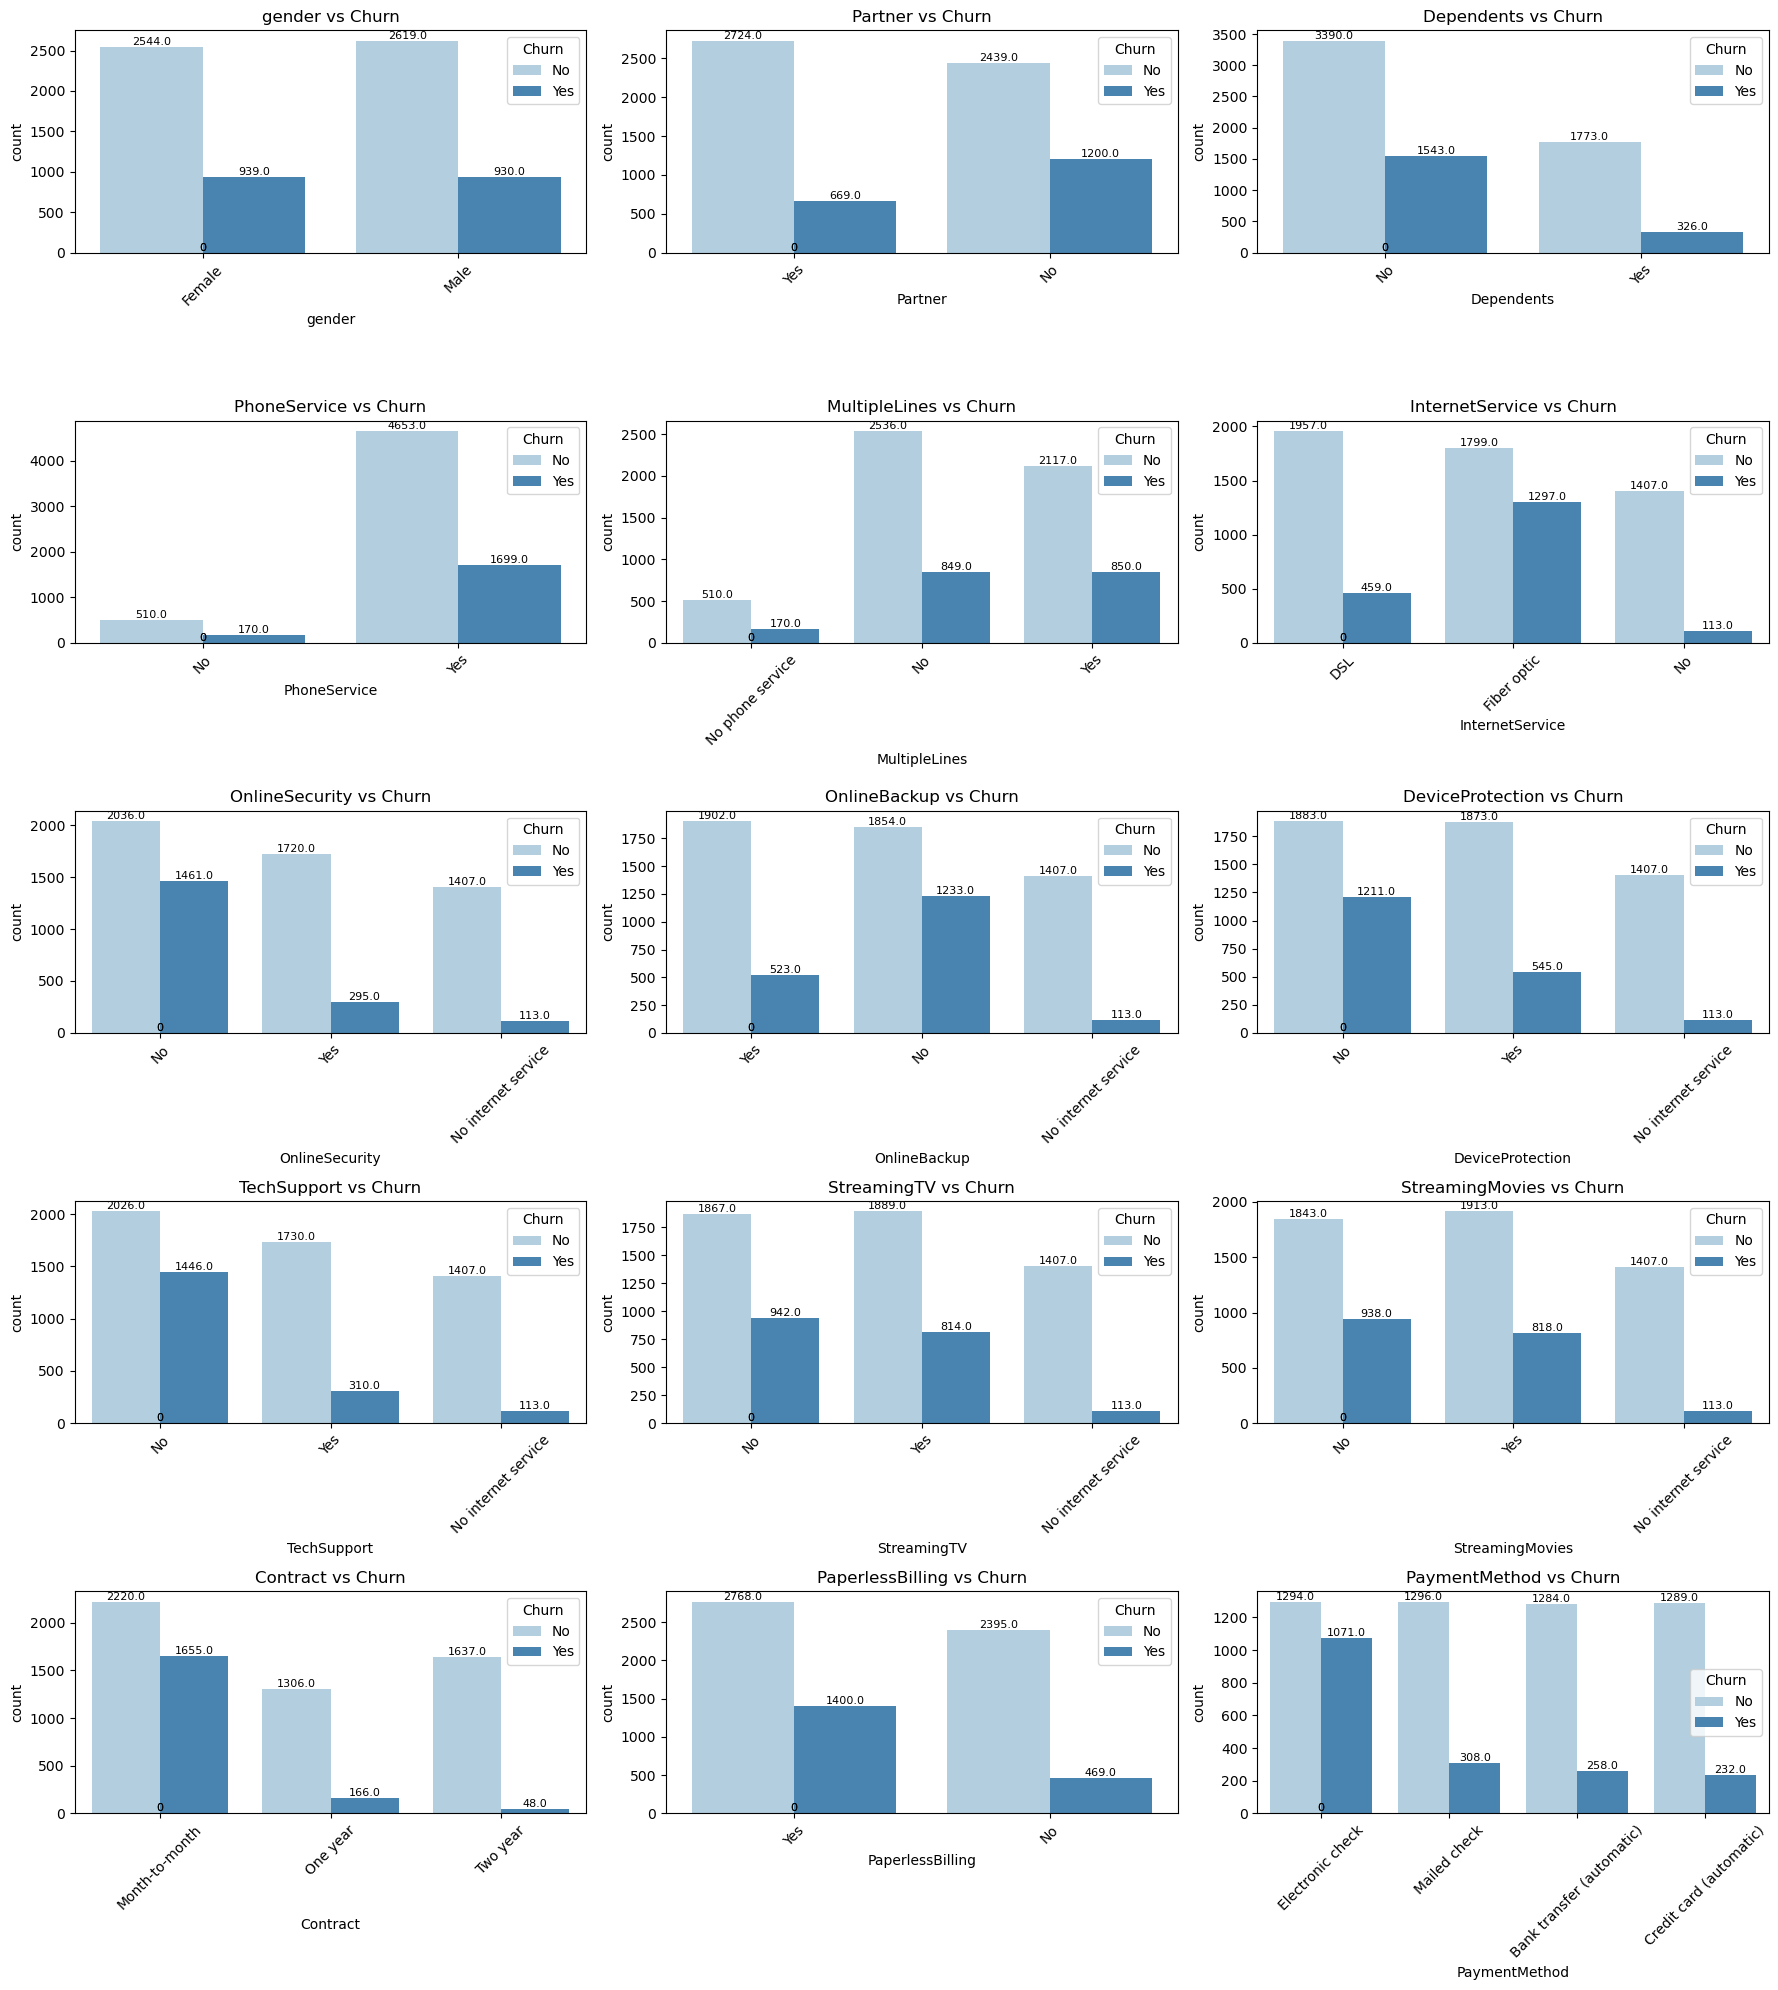

In [223]:
import math

categorical_cols = [
    'gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract',
    'PaperlessBilling','PaymentMethod'
]

n = len(categorical_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 3, i)
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='Blues')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)

    # Add labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## 5. Bivariate Analysis (Numerical vs Target - Churn)

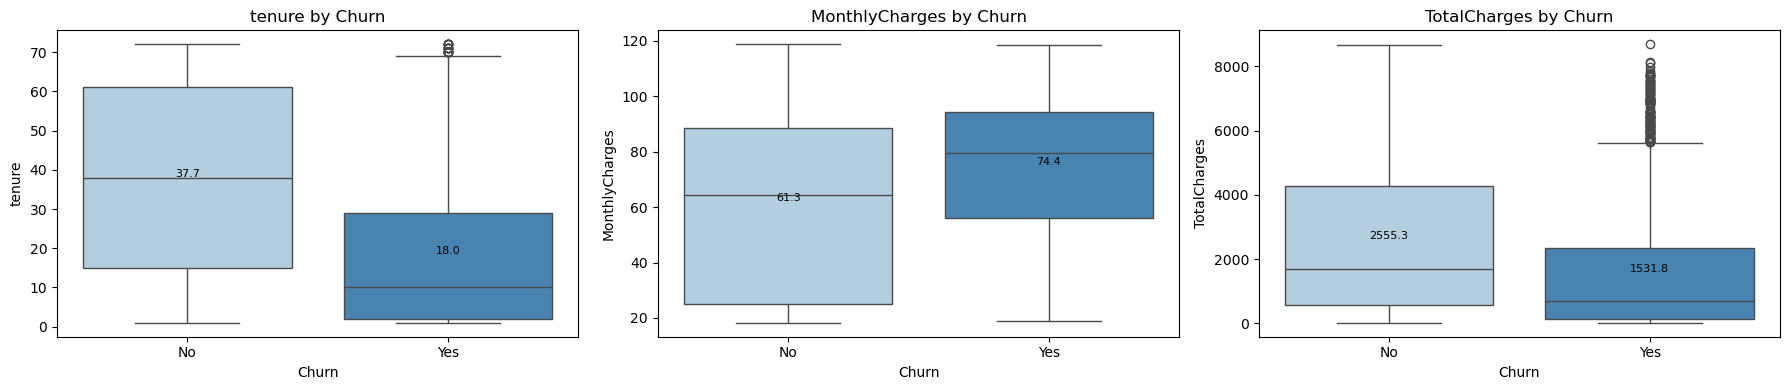

In [225]:
n = len(numerical_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    ax = sns.boxplot(data=df, x='Churn', y=col, palette='Blues')

    # Add mean labels for each Churn group
    means = df.groupby('Churn')[col].mean()

    for j, val in enumerate(means):
        plt.text(j, val, f'{val:.1f}', ha='center', va='bottom', fontsize=8)

    plt.title(f'{col} by Churn')

plt.tight_layout()
plt.show()


## 6. Numerical Analysis (Describe + Skewness + Correlation)

In [208]:
# Summary statistics
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [209]:
# Skewness
df[numerical_cols].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [210]:
# Correlation matrix
corr = df[numerical_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


## 7. Heatmap (Correlation Heatmap)

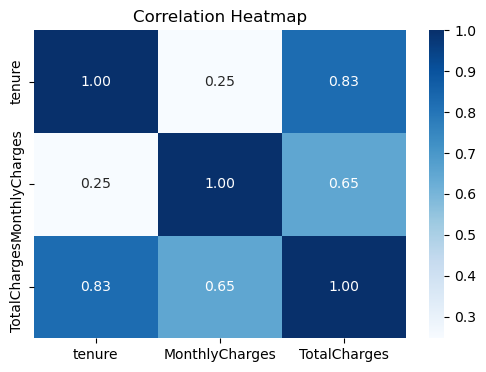

In [205]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 8. Heatmap (All Features)

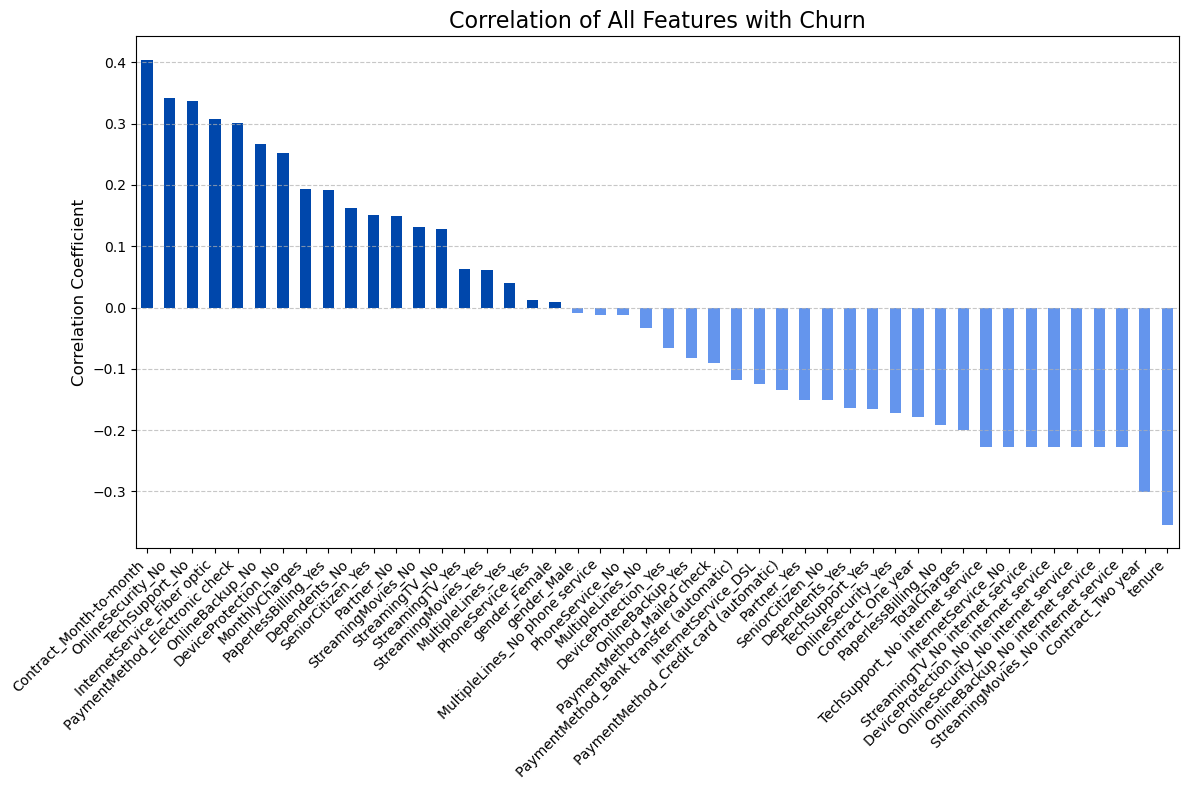

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create the dummy DataFrame (necessary for correlation calculation)
df_dummies = pd.get_dummies(df) 

# 2. Calculate correlation with the ENCODED target column ('Churn_Yes') and sort the values
corr_with_churn = df_dummies.corr()['Churn_Yes'].sort_values(ascending=False)

# 3. Define the blue color palette based on correlation value
def get_blue_color(correlation):
    # Use dark blue for positive correlation (increases churn)
    if correlation > 0:
        return '#0047AB'  
    # Use medium blue for negative correlation (decreases churn)
    else:
        return '#6495ED' 

# 4. Plot the results 
plt.figure(figsize=(12, 8))

# Drop the target columns themselves and apply the color function
plot_data = corr_with_churn.drop(['Churn_Yes', 'Churn_No'], errors='ignore')

plot_data.plot(
    kind='bar', 
    # Apply the blue color function to the plot data
    color=plot_data.apply(get_blue_color)
)

plt.title('Correlation of All Features with Churn', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Saving clean data

In [235]:
# Save the cleaned dataset for ML
df.to_csv("cleaned_customer_data.csv", index=False)

print("Cleaned dataset saved as cleaned_customer_data.csv")


Cleaned dataset saved as cleaned_customer_data.csv


## Conclusion / Recommendation

Based on the Exploratory Data Analysis (EDA), the following key patterns were observed:

1. <b>Churn is strongly influenced by specific services:</b> Customers without Online Security, Tech Support, or Internet Service protection churn at a higher rate. These services appear to provide retention value.

2. <b>Contract type plays a major role:</b> Month-to-month customers show significantly higher churn compared to 1-year and 2-year contract customers.

3. <b>Higher charges increase churn probability:</b> Customers with higher Monthly Charges and Total Charges tend to leave more frequently, indicating that pricing and perceived value may be contributing factors.

4. <b>Tenure is a major churn indicator:</b> Newer customers (lower tenure) churn more, suggesting that the first few months are critical for customer retention.

## Recommendations (for the business)

- Introduce discounts or reward programs for new customers to reduce early churn.
- Promote long-term contracts with incentives or bundled offers.
- Upsell Online Security / Tech Support plans since customers using them are more likely to stay.
- Re-evaluate pricing structure for customers with high monthly charges.

## Next Steps

In the next notebook, we will move from EDA to Machine Learning, where we will:

- Prepare the cleaned dataset
- Encode the features
- Train multiple ML models
- Evaluate model performance
- Identify the most important factors influencing churn
- This will help us build a predictive system to estimate which customers are most likely to churn.